In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("creditcard.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data = data[['BALANCE','PURCHASES']]
data

,BALANCE,PURCHASES
0,40.900749,95.40
1,3202.467416,0.00
2,2495.148862,773.17
3,1666.670542,1499.00
4,817.714335,16.00
...,...,...
8945,28.493517,291.12
8946,19.183215,300.00
8947,23.398673,144.40
8948,13.457564,0.00


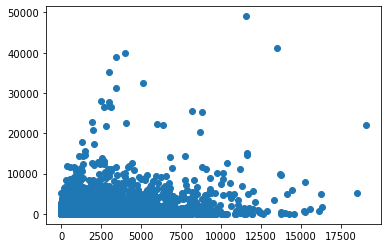

In [6]:
plt.scatter(data['BALANCE'], data['PURCHASES'])
plt.show()

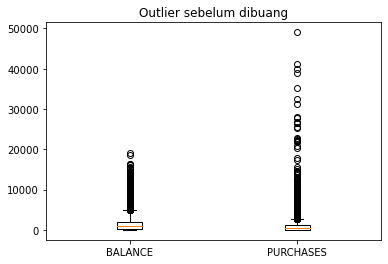

In [7]:
kolom = ['BALANCE','PURCHASES']
plt.boxplot(data[kolom])
plt.xticks([1,2],kolom)
plt.title("Outlier sebelum dibuang")
plt.show()

In [12]:
#Q1,Q3, IQR
Q1 = data[kolom].quantile(0.25)
Q3 = data[kolom].quantile(0.75)
IQR = Q3 - Q1

#menentukan nilai min dan max
min_iqr = Q1 - 1.5 * IQR
max_iqr = Q3 + 1.5 * IQR

data = data[~( (data[kolom] < min_iqr) | (data[kolom] > max_iqr) ).any(axis=1)]
data

,BALANCE,PURCHASES
0,40.900749,95.40
1,3202.467416,0.00
2,2495.148862,773.17
3,1666.670542,1499.00
4,817.714335,16.00
...,...,...
8945,28.493517,291.12
8946,19.183215,300.00
8947,23.398673,144.40
8948,13.457564,0.00


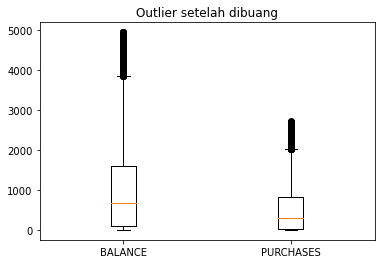

In [13]:
plt.boxplot(data[kolom])
plt.xticks([1,2],kolom)
plt.title("Outlier setelah dibuang")
plt.show()

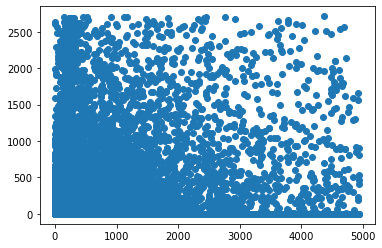

In [14]:
plt.scatter(data['BALANCE'], data['PURCHASES'])
plt.show()

In [15]:
#melakukan scalling
x_array = np.array(data)

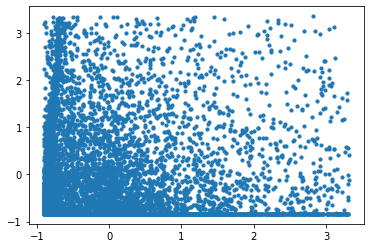

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10)
plt.show()


In [18]:
#membuat model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [20]:
#nilai cluster center
kmeans.cluster_centers_

array([[-0.44670466, -0.41780084],
       [-0.14233402,  1.71533878],
       [ 1.66782992, -0.34813453]])

In [21]:
#nilai cluster
kmeans.labels_

array([0, 2, 2, ..., 0, 0, 1])

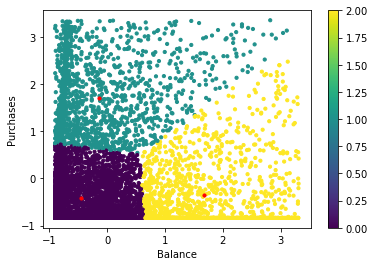

In [23]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10, c=kmeans.labels_)
centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c ='red', s=10)
plt.xlabel("Balance")
plt.ylabel("Purchases")
plt.colorbar(output)
plt.show()

In [24]:
#evaluasi clustering : mengecek hubungan keterkaitan antar data
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_

davies_bouldin_score(x_scaled, labels)


0.721943021837891